In [22]:
import mediapipe as mp
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [104]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [136]:
im = 'Mark-Zuckerberg-FB.jpg'
#im = 'hand.jpg'
im = 'full.jpg'
#im = 'download.png'
images = {im: cv2.imread(im)}

In [137]:
DESIRED_HEIGHT = 800
DESIRED_WIDTH = 600
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

Nose coordinates: (464.4968639612198, 173.42717045545578)
Pose landmarks of full.jpg:


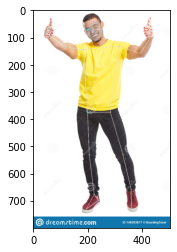

In [138]:
# Run MediaPipe Holistic and draw pose landmarks.
with mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as holistic:
    for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
        results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # Print nose coordinates.
        image_hight, image_width, _ = image.shape
        if results.pose_landmarks:
            print(
                f'Nose coordinates: ('
                f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
                f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_hight})'
            )

        # Draw pose landmarks.
        print(f'Pose landmarks of {name}:')
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(
            annotated_image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.
            get_default_pose_landmarks_style())
        resize_and_show(annotated_image)

In [139]:
pose = mp_holistic.PoseLandmark._member_names_
left_hand = ['LEFT_' + item for item in mp_holistic.HandLandmark._member_names_]
right_hand = ['RIGHT_' + item for item in mp_holistic.HandLandmark._member_names_]
face_keypoints = ['FACE_' + str(n) for n in range(1, len(results.face_landmarks.landmark)+1)]

In [140]:
keypoint_names = ['frame'] + pose + face_keypoints + left_hand + right_hand

In [141]:
len_pose_keypoints = 33
len_hand_keypoints = 21
len_face_keypoints = 468

In [142]:
print(results.pose_landmarks.landmark[0])

x: 0.43573814630508423
y: 0.10268038511276245
z: -0.7221669554710388
visibility: 0.9999603033065796



In [57]:
df = pd.DataFrame([], columns= keypoint_names)
df

,frame,NOSE,LEFT_EYE_INNER,LEFT_EYE,LEFT_EYE_OUTER,RIGHT_EYE_INNER,RIGHT_EYE,RIGHT_EYE_OUTER,LEFT_EAR,RIGHT_EAR,...,RIGHT_MIDDLE_FINGER_DIP,RIGHT_MIDDLE_FINGER_TIP,RIGHT_RING_FINGER_MCP,RIGHT_RING_FINGER_PIP,RIGHT_RING_FINGER_DIP,RIGHT_RING_FINGER_TIP,RIGHT_PINKY_MCP,RIGHT_PINKY_PIP,RIGHT_PINKY_DIP,RIGHT_PINKY_TIP


In [149]:
list(results.pose_landmarks.landmark)

[x: 0.43573814630508423
 y: 0.10268038511276245
 z: -0.7221669554710388
 visibility: 0.9999603033065796,
 x: 0.44122394919395447
 y: 0.08000054955482483
 z: -0.6779180765151978
 visibility: 0.9999008178710938,
 x: 0.45294222235679626
 y: 0.07677078247070312
 z: -0.6788718104362488
 visibility: 0.9999110698699951,
 x: 0.46385249495506287
 y: 0.07414650917053223
 z: -0.6786547303199768
 visibility: 0.9999046325683594,
 x: 0.4133983254432678
 y: 0.08739253878593445
 z: -0.6642877459526062
 visibility: 0.9999088048934937,
 x: 0.40547218918800354
 y: 0.08932113647460938
 z: -0.665065586566925
 visibility: 0.9999275207519531,
 x: 0.39814114570617676
 y: 0.09100887179374695
 z: -0.6654072403907776
 visibility: 0.9998923540115356,
 x: 0.4935535788536072
 y: 0.07626259326934814
 z: -0.37712228298187256
 visibility: 0.9999434947967529,
 x: 0.40115687251091003
 y: 0.0950060486793518
 z: -0.30948323011398315
 visibility: 0.9998052716255188,
 x: 0.46731141209602356
 y: 0.11502772569656372
 z: -0.60

In [157]:
frame = [0]

In [158]:
keypoints = frame + list(results.pose_landmarks.landmark) + list(results.face_landmarks.landmark) + list(results.left_hand_landmarks.landmark) + list(results.right_hand_landmarks.landmark)

In [159]:
len(keypoints)

544

In [166]:
df.loc['0'] = keypoints

In [172]:
df['NOSE'].item().x

0.43573814630508423

In [7]:
from IPython.display import Video

Video("vocabulario para salud basico.mp4", width=400, height=300)